# Get In The Hole!

## Predicting If a Golf Putt Will Go In

### Table of Contents

1. Introduction
   1. Data Description
2. Import Packages and Data

3. Explanatory Data Analysis

4. Model Building Preparation

5. Model Testing
    1. Logistic Regression
    2. Gaussian Naive Bayes
    3. Decision Trees
    4. Random Forest
    5. Gradient Boosting
    6. K Nearest Neighbors
6. Conclusion

7. Data Dictionary

#### 1. Introduction

Putting is one of the easiest aspects of golf to practice but one of the most difficult things to deliver on in sports. When the pressure's on and the money's on the line, it's just you, the ball, the hole, and all the thoughts you can possibly have racing through your mind. This project aims to identify the key factors in predicting whether or not a putt will go in the hole to help make the job of putting a little bit easier. 

The data was gathered from stats.pgatourhq.com. It includes every single shot taken over the course of the 2018 PGA Tour season, as well aggregated statistics about each player in the dataset and all the tournaments and events played in the previous season. We may not all be able to putt like the pros, but we might be able to use machine learning to learn from them and improve our own game.

#### 1. A. Data Description

Players:

    Dataset with putting statistics from 2017 season as well as other player stats
    
Tournaments:

    Aggregated tournament stats for every event played in 2018 season (as well as 2017 stats for same event)
        
Courses:

    Details and statistics about each course played in 2018 season
    
Events:
    
    Total tournament statistics for every player in every tournament during 2018 season
    
Rounds:

    Round statistics for every player in every tournament during 2018 season
    
Holes:

    Stats for every hole played in 2018 season

Shots:

    Stats for every shot taken on PGATour in 2018

#### 2. Import Packages and Data

In [348]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
%matplotlib inline
from pylab import *
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import warnings 
warnings.filterwarnings('ignore')

In [354]:
shots1 = pd.read_csv("shots_stats1.csv", encoding = "ISO-8859-1")
shots2 = pd.read_csv("shots_stats2.csv", encoding = "ISO-8859-1")
shots3 = pd.read_csv("shots_stats3.csv", encoding = "ISO-8859-1")
holes = pd.read_csv("hole_stats.csv", encoding = "ISO-8859-1")
rounds = pd.read_csv("round_stats.csv", encoding = "ISO-8859-1")
events = pd.read_csv("event_stats.csv", encoding = "ISO-8859-1")
courses = pd.read_csv("course_stats.csv")
players = pd.read_csv("player_stats.csv")
tournaments = pd.read_csv("tournament_stats.csv")

In [355]:
shots_dfs = [shots1, shots2, shots3]
shots = pd.concat(shots_dfs)
shots.head()

(198460, 25)

In [7]:
holes.head()

,Player Course Round Hole,Player Name,Hole #,Round #,Final Round,Event Name,Course Name,Par - Hole,Scorecard Yard,Score,...,Driving Distance,Tee Shot Landing Loc,Appr Shot Dist to the Pin,Appr Shot Prox to the Hole,Appr Shot Landing Loc,Made Putt Distance,Went for it,Appr Shot Start Loc,Hole Seq #,Time Hole Finished
0,"Zhang, Xinjun - Waialae CC - 4 - 9","Zhang, Xinjun",9,4,1,Sony Open in Hawaii,Waialae CC,5,506,5,...,290,Fairway Bunker,2071,300,Green,33,0,Fairway,9,11:52
1,"Zhang, Xinjun - Waialae CC - 4 - 8","Zhang, Xinjun",8,4,1,Sony Open in Hawaii,Waialae CC,4,454,6,...,282,Fairway,6602,585,Primary Rough,23,-1,Fairway,8,11:35
2,"Zhang, Xinjun - Waialae CC - 4 - 7","Zhang, Xinjun",7,4,1,Sony Open in Hawaii,Waialae CC,3,176,2,...,0,Green,6084,102,Green,102,-1,Tee Box,7,11:18
3,"Zhang, Xinjun - Waialae CC - 4 - 6","Zhang, Xinjun",6,4,1,Sony Open in Hawaii,Waialae CC,4,460,4,...,296,Cart Path,6765,556,Green,41,-1,Other,6,11:08
4,"Zhang, Xinjun - Waialae CC - 4 - 5","Zhang, Xinjun",5,4,1,Sony Open in Hawaii,Waialae CC,4,467,4,...,276,Primary Rough,6655,492,Green,26,-1,Primary Rough,5,10:48


In [8]:
rounds.head()

,Course Round Player,Course Par,Course Yardage,Tee Time,Round Score,End of Round Finish Pos,End of Event Pos,Eagles - Round,Birdies - Round,Pars - Round,...,Doubles - Round,Others - Round,Total Holes Over Par - Round,Longest Drive - Round,GIR - Round,Total Putts - Round,GIR Putts - Round,Total One Putts - Round,Total 3 Putts - Round,Total Distance of Putts - Round
0,Silverado Resort and Spa North - 1 - Mickelson...,72,7166,12:40,69,12,3,0,5,11,...,0,0,2,338,14,30,25,4,0,565
1,"Silverado Resort and Spa North - 1 - Pride, Dicky",72,7166,8:10,72,61,999,0,1,16,...,0,0,1,296,13,30,26,5,1,567
2,"Silverado Resort and Spa North - 1 - Campbell,...",72,7166,12:20,70,24,68,0,4,12,...,0,0,2,317,14,30,25,7,1,808
3,"Silverado Resort and Spa North - 1 - Armour, Ryan",72,7166,13:00,72,61,999,0,2,14,...,0,0,2,303,13,31,25,6,1,604
4,"Silverado Resort and Spa North - 1 - Gay, Brian",72,7166,12:30,75,120,999,0,3,9,...,0,0,6,302,7,26,12,11,1,1024


In [9]:
events.head()

,Event Player,Age,Position,Round 1 Score,Round 2 Score,Round 3 Score,Round 4 Score,Total Strokes,Total Rounds,Total Holes Over Par,Total Holes Under Par,GIR,Longest Drive,Total Putts,GIR Putts,Total One Putts,Total 3 Putts,Total Distance of Putts
0,"Safeway Open - Allan, Steve",43,999,72,76,0,0,148,2,6,3,26,332,64,50,9,1,1183
1,"Safeway Open - Ancer, Abraham",26,37,72,70,70,72,284,4,9,13,47,379,113,83,29,0,3320
2,"Safeway Open - Armour, Ryan",41,999,72,72,0,0,144,2,6,6,25,303,61,46,13,2,1740
3,"Safeway Open - Atkins, Matt",26,999,72,75,0,0,147,2,8,6,18,339,53,31,17,0,2053
4,"Safeway Open - Axley, Eric",43,999,72,75,0,0,147,2,8,5,20,314,58,37,13,1,1161


In [10]:
courses.head()

,Course Round Hole,Grn Firmness,Grn Height,Stimp,AM Wind Spd,AM Wind Dir,PM Wind Spd,PM Wind Dir,Green Grass
0,Torrey Pines GC (South) - 1 - 1,Firm,0.9,12.5,Var 3-6,SW,W 5-10,IW,Poa annua
1,Torrey Pines GC (South) - 1 - 2,Firm,0.9,12.5,Var 3-6,SW,W 5-10,RL,Poa annua
2,Torrey Pines GC (South) - 1 - 3,Firm,0.9,12.5,Var 3-6,SW,W 5-10,RL,Poa annua
3,Torrey Pines GC (South) - 1 - 4,Firm,0.9,12.5,Var 3-6,SW,W 5-10,LR,Poa annua
4,Torrey Pines GC (South) - 1 - 5,Firm,0.9,12.5,Var 3-6,SW,W 5-10,RL,Poa annua


In [11]:
players.head()

,Player,Avg SG Putting,Avg putts per round,one putt %,three putt %,Avg # of putts,2017 scoring avg,2018 scoring avg,2017 money,2018 money,world golf ranking,events
0,"Thompson, Michael",0.840,28.88,39.98,2.38,1.604,71.207,71.751,568991,99992,356,41
1,"Fowler, Rickie",0.761,28.30,43.64,2.85,1.572,69.083,69.496,6083197,1204250,7,47
2,"Donald, Luke",0.704,28.56,41.55,1.62,1.587,70.831,71.261,958850,68404,171,49
3,"McDowell, Graeme",0.576,28.32,42.96,3.27,1.573,70.629,71.502,639770,252341,208,52
4,"Harman, Brian",0.542,28.33,42.22,2.06,1.574,70.402,69.879,4396470,1532084,21,52


In [12]:
tournaments.head()

,Course Hole,Avg Score,Avg O/U Par,Eagle,Birdie,Pars,Bogey,Dbl Bogey,Other,2017 Average,2018 rd 1,2018 rd 2,2018 rd 3,2018 rd 4,2018 Average
0,Torrey Pines GC (South) - 12,4.410,0.410,0,17,163,116,14,0,72.268,71.462,72.090,72.208,74.779,72.343
1,El Camaleon GC - 14,4.373,0.373,1,19,253,113,24,5,69.609,70.348,70.504,70.654,69.654,70.323
2,Riviera CC - 12,4.362,0.362,0,26,254,135,17,4,71.012,72.203,72.135,70.605,71.382,71.759
3,CC of Jackson - 16,4.348,0.348,0,25,248,107,24,4,71.058,71.542,71.654,72.120,72.333,71.828
4,Torrey Pines GC (South) - 4,4.329,0.329,0,24,173,100,13,0,72.268,71.462,72.090,72.208,74.779,72.343


#### 3. Exploratory Data Analysis

Before getting started we have to do a little bit of data cleaning to get the data how we need it. First we have to merge the datasets together.

In [13]:
shots.shape

(198460, 25)

In [357]:
shots_t = shots.merge(tournaments, how="inner", on="Course Hole");
shots_t_p = shots_t.merge(players, how="inner", on="Player");
shots_t_p_c = shots_t_p.merge(courses, how="inner", on="Course Round Hole");
shots_t_p_c_e = shots_t_p_c.merge(events, how="inner", on="Event Player");
shots_t_p_c_e_r = shots_t_p_c_e.merge(rounds, how="inner", on="Course Round Player");
golf_df = shots_t_p_c_e_r.merge(holes, how="inner", on="Player Course Round Hole"); golf_df.shape

(198460, 121)

Filter the dataset to include only putts, and convert the outcome variable so it can be used for classifaction.

In [15]:
putts_df = golf_df[golf_df["Strokes Gained Category"] == "Putting"]

In [16]:
putts_final_df = pd.get_dummies(putts_df, columns=["In the Hole Flag"])
putts_final_df.rename(index=str, columns={"In the Hole Flag_Y": "In the Hole"}, inplace=True)
putts_final_df.drop("In the Hole Flag_N", axis=1, inplace = True)

In [17]:
putts_final_df.describe()

,Shot,Distance,Distance to Pin,Distance to Hole after the Shot,Distance from Center,Distance from Edge,Avg Score,Avg O/U Par,Eagle,Birdie,...,Sand Save,Scrambling Success,Putts,Driving Distance,Appr Shot Dist to the Pin,Appr Shot Prox to the Hole,Made Putt Distance,Went for it,Hole Seq #,In the Hole
count,80956.000000,80956.000000,80956.000000,80956.000000,80956.000000,80956.000000,80956.000000,80956.000000,80956.000000,80956.000000,...,80956.000000,80956.000000,80956.000000,80956.000000,80956.000000,80956.000000,80956.000000,80956.000000,80956.000000,80956.000000
mean,3.664003,130.192808,126.391101,9.627193,6.195143,113.593915,3.942399,-0.011798,1.710164,72.121486,...,0.026558,-0.602908,1.814751,204.372462,5414.148192,411.258400,36.146388,-0.687682,9.494787,0.611320
std,0.941875,168.763511,167.389447,20.286918,15.810113,206.477162,0.536765,0.211042,4.694537,49.474074,...,0.160788,0.690564,0.514442,133.838864,2525.809513,349.059903,53.175750,0.665938,5.195337,0.487453
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.759000,-0.790000,0.000000,5.000000,...,0.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000
25%,3.000000,17.000000,17.000000,0.000000,0.000000,0.000000,3.832000,-0.084000,0.000000,39.000000,...,0.000000,-1.000000,2.000000,0.000000,4247.000000,164.000000,10.000000,-1.000000,5.000000,0.000000
50%,4.000000,51.000000,50.000000,0.000000,0.000000,0.000000,4.043000,0.028000,0.000000,61.000000,...,0.000000,-1.000000,2.000000,274.000000,5627.000000,331.000000,22.000000,-1.000000,9.000000,1.000000
75%,4.000000,189.000000,178.000000,13.000000,7.000000,190.000000,4.179000,0.140000,1.000000,81.000000,...,0.000000,0.000000,2.000000,299.000000,6804.000000,567.000000,40.000000,-1.000000,14.000000,1.000000
max,11.000000,1960.000000,1446.000000,1045.000000,1655.000000,2127.000000,5.126000,0.410000,39.000000,285.000000,...,1.000000,1.000000,5.000000,430.000000,17064.000000,2396.000000,1088.000000,1.000000,18.000000,1.000000


Abbreviate the names of each event so they look cleaner in our EDA.

In [18]:
putts_final_df['Event Name'].value_counts()

Waste Management Phoenix Open           9811
Genesis Open                            8958
Shriners Hospitals for Children Open    8870
Sony Open in Hawaii                     8254
Safeway Open                            8131
OHL Classic at Mayakoba                 7465
Farmers Insurance Open                  6348
The RSM Classic                         5513
Sanderson Farms Championship            5174
AT&T Pebble Beach Pro-Am                4298
CareerBuilder Challenge                 4173
Sentry Tournament of Champions          3961
Name: Event Name, dtype: int64

In [19]:
putts_final_df.loc[putts_final_df['Event Name'] == 'Waste Management Phoenix Open', 'Abbreviated Event Name'] = 'WMPO'
putts_final_df.loc[putts_final_df['Event Name'] == 'Genesis Open', 'Abbreviated Event Name'] = 'GO'
putts_final_df.loc[putts_final_df['Event Name'] == 'Shriners Hospitals for Children Open', 'Abbreviated Event Name'] = 'SHCO'
putts_final_df.loc[putts_final_df['Event Name'] == 'Sony Open in Hawaii', 'Abbreviated Event Name'] = 'SOiH'
putts_final_df.loc[putts_final_df['Event Name'] == 'Safeway Open', 'Abbreviated Event Name'] = 'SO'
putts_final_df.loc[putts_final_df['Event Name'] == 'OHL Classic at Mayakoba', 'Abbreviated Event Name'] = 'OCaM'
putts_final_df.loc[putts_final_df['Event Name'] == 'Farmers Insurance Open', 'Abbreviated Event Name'] = 'FIO'
putts_final_df.loc[putts_final_df['Event Name'] == 'The RSM Classic', 'Abbreviated Event Name'] = 'TRC'
putts_final_df.loc[putts_final_df['Event Name'] == 'Sanderson Farms Championship', 'Abbreviated Event Name'] = 'SFC'
putts_final_df.loc[putts_final_df['Event Name'] == 'AT&T Pebble Beach Pro-Am', 'Abbreviated Event Name'] = 'APBP'
putts_final_df.loc[putts_final_df['Event Name'] == 'CareerBuilder Challenge', 'Abbreviated Event Name'] = 'CC'
putts_final_df.loc[putts_final_df['Event Name'] == 'Sentry Tournament of Champions', 'Abbreviated Event Name'] = 'SToC'
putts_final_df['Abbreviated Event Name'].value_counts()

WMPO    9811
GO      8958
SHCO    8870
SOiH    8254
SO      8131
OCaM    7465
FIO     6348
TRC     5513
SFC     5174
APBP    4298
CC      4173
SToC    3961
Name: Abbreviated Event Name, dtype: int64

In [178]:
putts_final_df['In the Hole'].value_counts()

1    49490
0    31466
Name: In the Hole, dtype: int64

In [20]:
putts_final_numeric = putts_final_df._get_numeric_data(); putts_final_numeric.shape

(80956, 89)

In [21]:
list(putts_final_numeric)

['Shot',
 'Distance',
 'Distance to Pin',
 'Distance to Hole after the Shot',
 'Distance from Center',
 'Distance from Edge',
 'Avg Score',
 'Avg O/U Par',
 'Eagle',
 'Birdie',
 'Pars',
 'Bogey',
 'Dbl Bogey',
 'Other',
 '2017 Average',
 '2018 rd 1',
 '2018 rd 2',
 '2018 rd 3',
 '2018 rd 4',
 '2018 Average',
 'Avg SG Putting',
 'Avg putts per round',
 'one putt %',
 'three putt %',
 'Avg # of putts',
 '2017 scoring avg',
 '2018 scoring avg',
 '2017 money',
 '2018 money',
 'world golf ranking',
 'events',
 'Grn Height',
 'Stimp',
 'Age',
 'Position',
 'Round 1 Score',
 'Round 2 Score',
 'Round 3 Score',
 'Round 4 Score',
 'Total Strokes',
 'Total Rounds',
 'Total Holes Over Par',
 'Total Holes Under Par',
 'GIR',
 'Longest Drive',
 'Total Putts',
 'GIR Putts',
 'Total One Putts',
 'Total 3 Putts',
 'Total Distance of Putts',
 'Course Par',
 'Course Yardage',
 'Round Score',
 'End of Round Finish Pos',
 'End of Event Pos',
 'Eagles - Round',
 'Birdies - Round',
 'Pars - Round',
 'Bogeys 

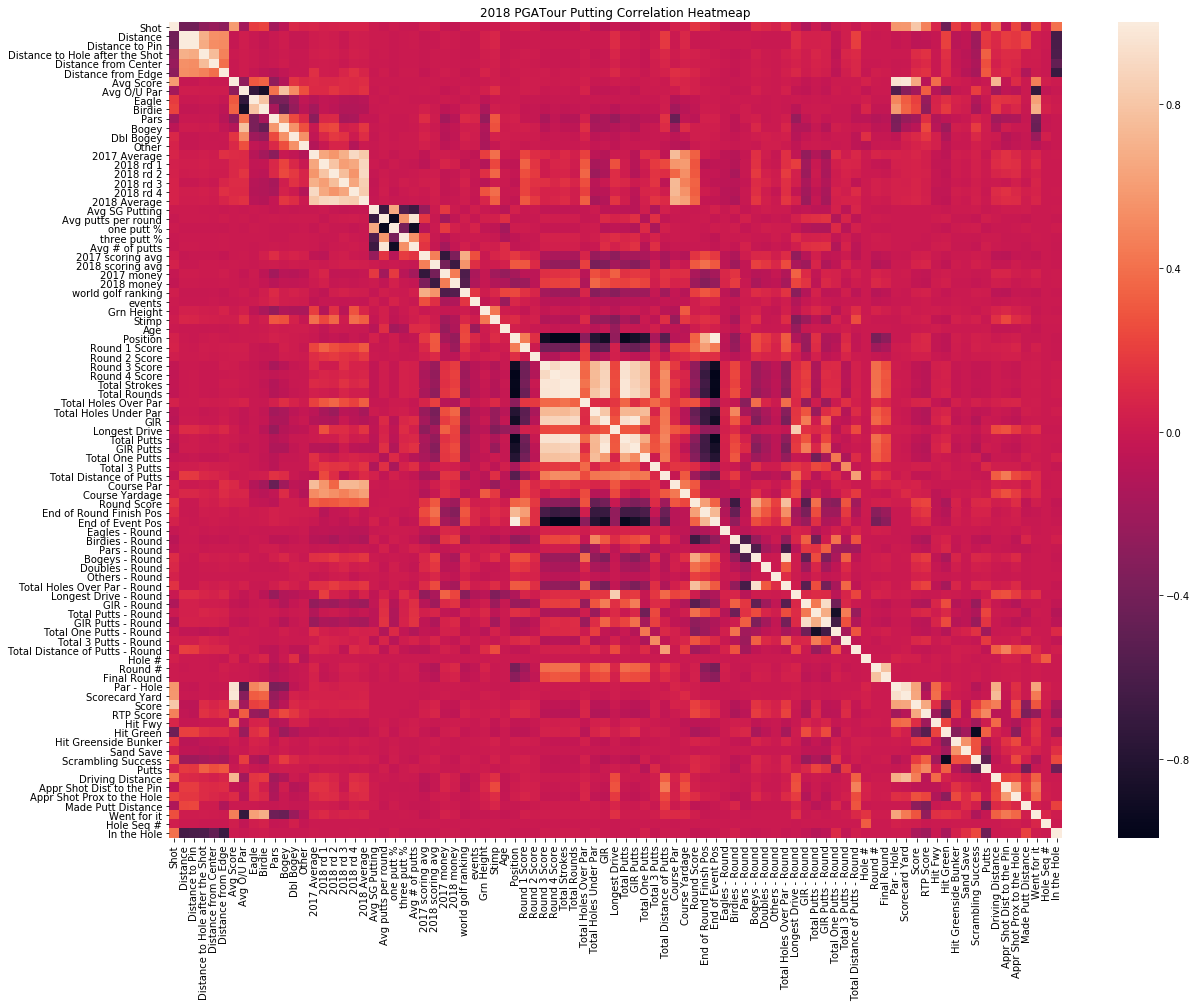

In [22]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("2018 PGATour Putting Correlation Heatmeap")
corr = putts_final_numeric.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

The correlation heatmap shows us that most of the variables we worked so hard to get don't have much of a relationship with a putt being made. There are a few numerical features which do stand out a little: Shot # for hole, Distance of putt, Distance to Pin from starting point, Distance to Hole after the Shot, Distance from Center, Distance from Edge, % of putts made in one try, # of Birdies over the round of 18 holes, Score on hole, Score relative to par on hole, Whether a green was hit for a birdie try, Scrambling success, and # of putts for hole. We can toss out a few of the distance variables since it turns out they always show 0 if a putt was made. Let's look closer at the other variables.

In [23]:
red_green = ["red", "green"]
palette = sns.color_palette(red_green)
sns.set_palette(palette)

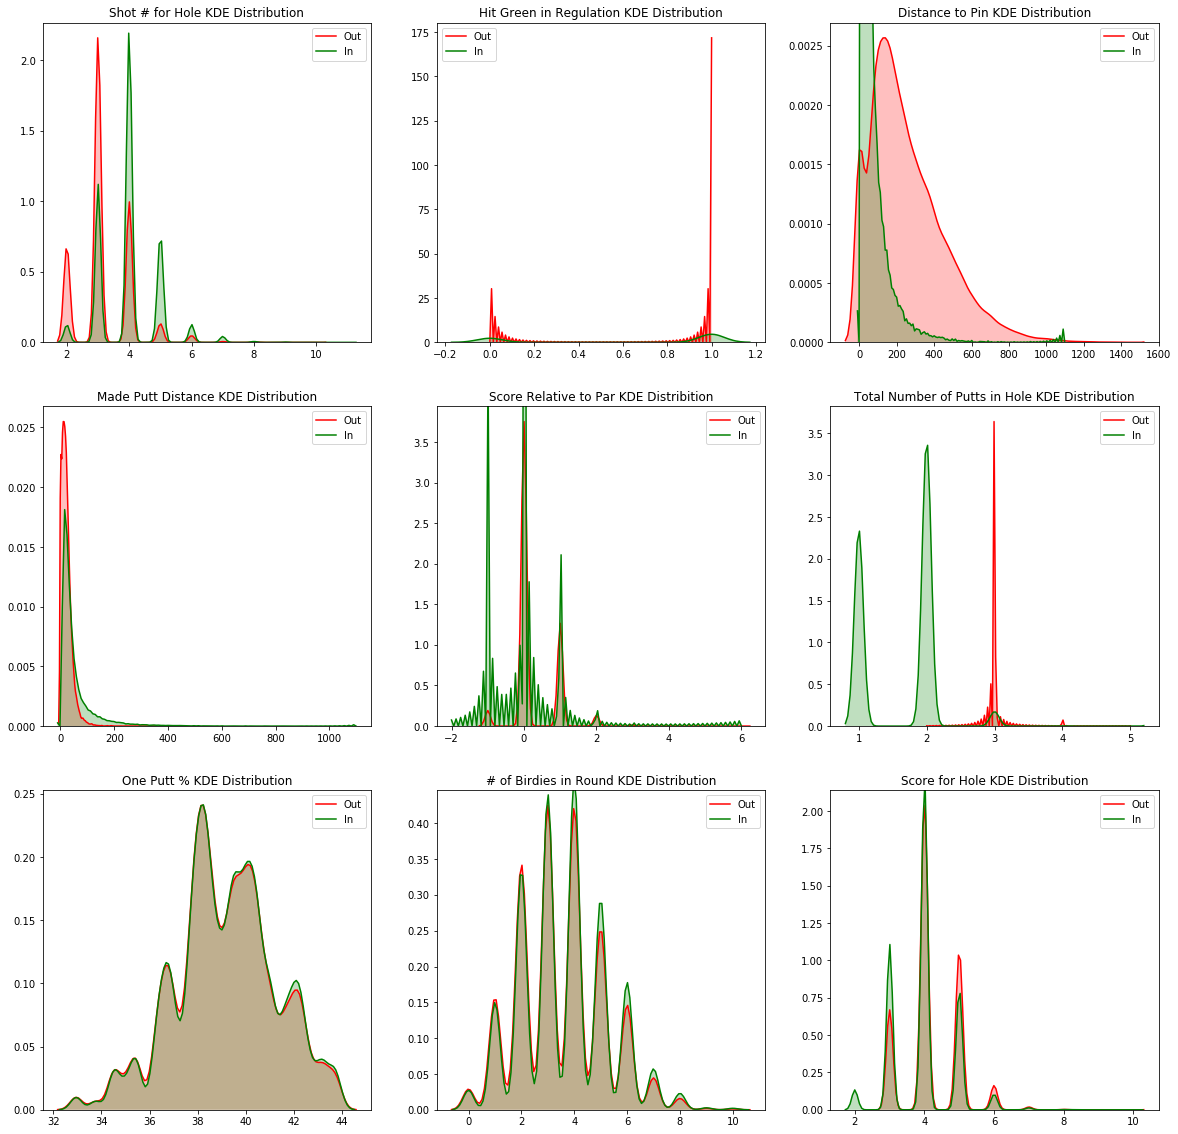

In [24]:
plt.subplots(figsize = (20,20))
plt.subplot(3,3,1)
sns.kdeplot(putts_final_df['Shot'][putts_final_df['In the Hole'] == 0], shade = True, label = 'Out')
sns.kdeplot(putts_final_df['Shot'][putts_final_df['In the Hole'] == 1], shade = True, label = 'In')
plt.title("Shot # for Hole KDE Distribution")
plt.subplot(3,3,2)
sns.kdeplot(putts_final_df['Hit Green'][putts_final_df['In the Hole'] == 0], shade = True, label = 'Out')
sns.kdeplot(putts_final_df['Hit Green'][putts_final_df['In the Hole'] == 1], shade = True, label = 'In')
plt.title("Hit Green in Regulation KDE Distribution")
plt.subplot(3,3,3)
sns.kdeplot(putts_final_df['Distance to Pin'][putts_final_df['In the Hole'] == 0], shade = True, label = 'Out')
sns.kdeplot(putts_final_df['Distance to Pin'][putts_final_df['In the Hole'] == 1], shade = True, label = 'In')
plt.title("Distance to Pin KDE Distribution")
plt.subplot(3,3,4)
sns.kdeplot(putts_final_df['Made Putt Distance'][putts_final_df['In the Hole'] == 0], shade = True, label = 'Out')
sns.kdeplot(putts_final_df['Made Putt Distance'][putts_final_df['In the Hole'] == 1], shade = True, label = 'In')
plt.title("Made Putt Distance KDE Distribution")
plt.subplot(3,3,5)
sns.kdeplot(putts_final_df['RTP Score'][putts_final_df['In the Hole'] == 0], shade = True, label = 'Out')
sns.kdeplot(putts_final_df['RTP Score'][putts_final_df['In the Hole'] == 1], shade = True, label = 'In')
plt.title("Score Relative to Par KDE Distribition")
plt.subplot(3,3,6)
sns.kdeplot(putts_final_df['Putts'][putts_final_df['In the Hole'] == 0], shade = True, label = 'Out')
sns.kdeplot(putts_final_df['Putts'][putts_final_df['In the Hole'] == 1], shade = True, label = 'In')
plt.title("Total Number of Putts in Hole KDE Distribution")
plt.subplot(3,3,7)
sns.kdeplot(putts_final_df['one putt %'][putts_final_df['In the Hole'] == 0], shade = True, label = 'Out')
sns.kdeplot(putts_final_df['one putt %'][putts_final_df['In the Hole'] == 1], shade = True, label = 'In')
plt.title("One Putt % KDE Distribution")
plt.subplot(3,3,8)
sns.kdeplot(putts_final_df['Birdies - Round'][putts_final_df['In the Hole'] == 0], shade = True, label = 'Out')
sns.kdeplot(putts_final_df['Birdies - Round'][putts_final_df['In the Hole'] == 1], shade = True, label = 'In')
plt.title("# of Birdies in Round KDE Distribution")
plt.subplot(3,3,9)
sns.kdeplot(putts_final_df['Score'][putts_final_df['In the Hole'] == 0], shade = True, label = 'Out')
sns.kdeplot(putts_final_df['Score'][putts_final_df['In the Hole'] == 1], shade = True, label = 'In')
plt.title("Score for Hole KDE Distribution")
plt.show()

The above plots tell us that shorter putts are much more likely to go in, and putts taken early in the hole are less likely. Let's examine some of the numerical variables further.

In [25]:
blue = ['blue']
palette = sns.color_palette(blue)
sns.set_palette(palette)

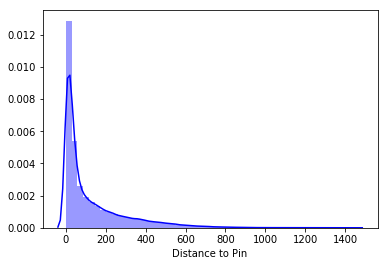

In [26]:
sns.distplot(putts_final_df['Distance to Pin'])

In [27]:
bins = [-1, 36, 60, 84, 120, 180, 240, 300, 420, np.inf]
labels = ['<3 ft', '3-5 ft', '5-7 ft', '7-10 ft', '10-15 ft', '15-20 ft', '20-25 ft', '25-35 ft', '>35 ft']
putts_final_df['Distance to Hole'] = pd.cut(putts_final_df['Distance to Pin'], bins, labels = labels)

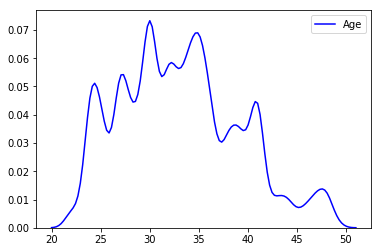

In [28]:
sns.kdeplot(putts_final_df['Age'])

In [29]:
bins = [-1, 25, 30, 35, 40, 45, np.inf]
labels = ['<25', '25-30', '30-35', '35-40', '40-45', '>45']
putts_final_df['AgeGroup'] = pd.cut(putts_final_df['Age'], bins, labels = labels)

In [30]:
putts_final_df['Total Holes Under Par - Round'] = putts_final_df['Birdies - Round'] + putts_final_df['Eagles - Round']

In [31]:
current_palette = sns.color_palette("Set1")
sns.set_palette(current_palette)

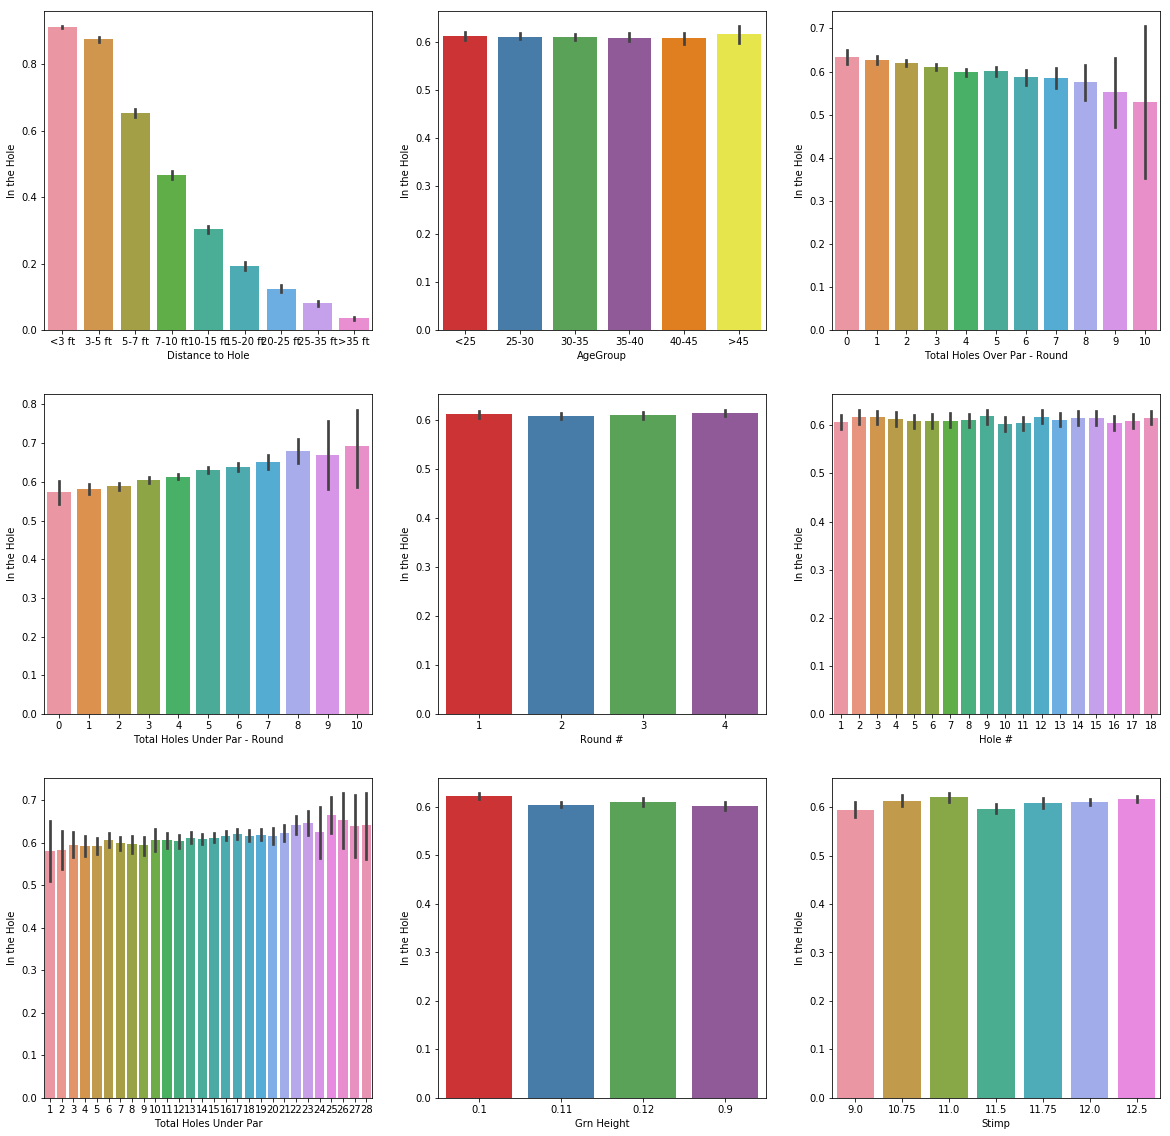

In [32]:
plt.subplots(figsize = (20,20))
plt.subplot(3,3,1)
sns.barplot(x="Distance to Hole", y="In the Hole", data=putts_final_df)
plt.subplot(3,3,2)
sns.barplot(x="AgeGroup", y="In the Hole", data=putts_final_df)
plt.subplot(3,3,3)
sns.barplot(x="Total Holes Over Par - Round", y="In the Hole", data=putts_final_df)
plt.subplot(3,3,4)
sns.barplot(x="Total Holes Under Par - Round", y="In the Hole", data=putts_final_df)
plt.subplot(3,3,5)
sns.barplot(x="Round #", y="In the Hole", data=putts_final_df)
plt.subplot(3,3,6)
sns.barplot(x="Hole #", y="In the Hole", data=putts_final_df)
plt.subplot(3,3,7)
sns.barplot(x="Total Holes Under Par", y="In the Hole", data=putts_final_df)
plt.subplot(3,3,8)
sns.barplot(x="Grn Height", y="In the Hole", data=putts_final_df)
plt.subplot(3,3,9)
sns.barplot(x="Stimp", y="In the Hole", data=putts_final_df)

plt.show()

So what did we learn from the bar charts of the numerical variables? Age doesn't have much of a correlation with making putts. Neither does the round of the tournament, or surprisingly, the height of the green grass nor the stimp (measure of the speed of the green). Total number of holes under & over par do seem to have a small effect, meaning momentum could be a real thing. The hole # doesn't seem to have much of an effect, but it is interesting to note that players tend to putt worse on the 1st, 10th, and 11th holes. Players often start their rounds on the 10th hole (to speed up play in a 150 person tournament), so this could point to first hole jitters. Players also tend to putt a little bit better on the 9th and 18th holes - perhaps extra motivation to finish strong?

Even though the correlation heatmap showed little relation between putts made and player stats, let's take a look at them anyway since we have the data.

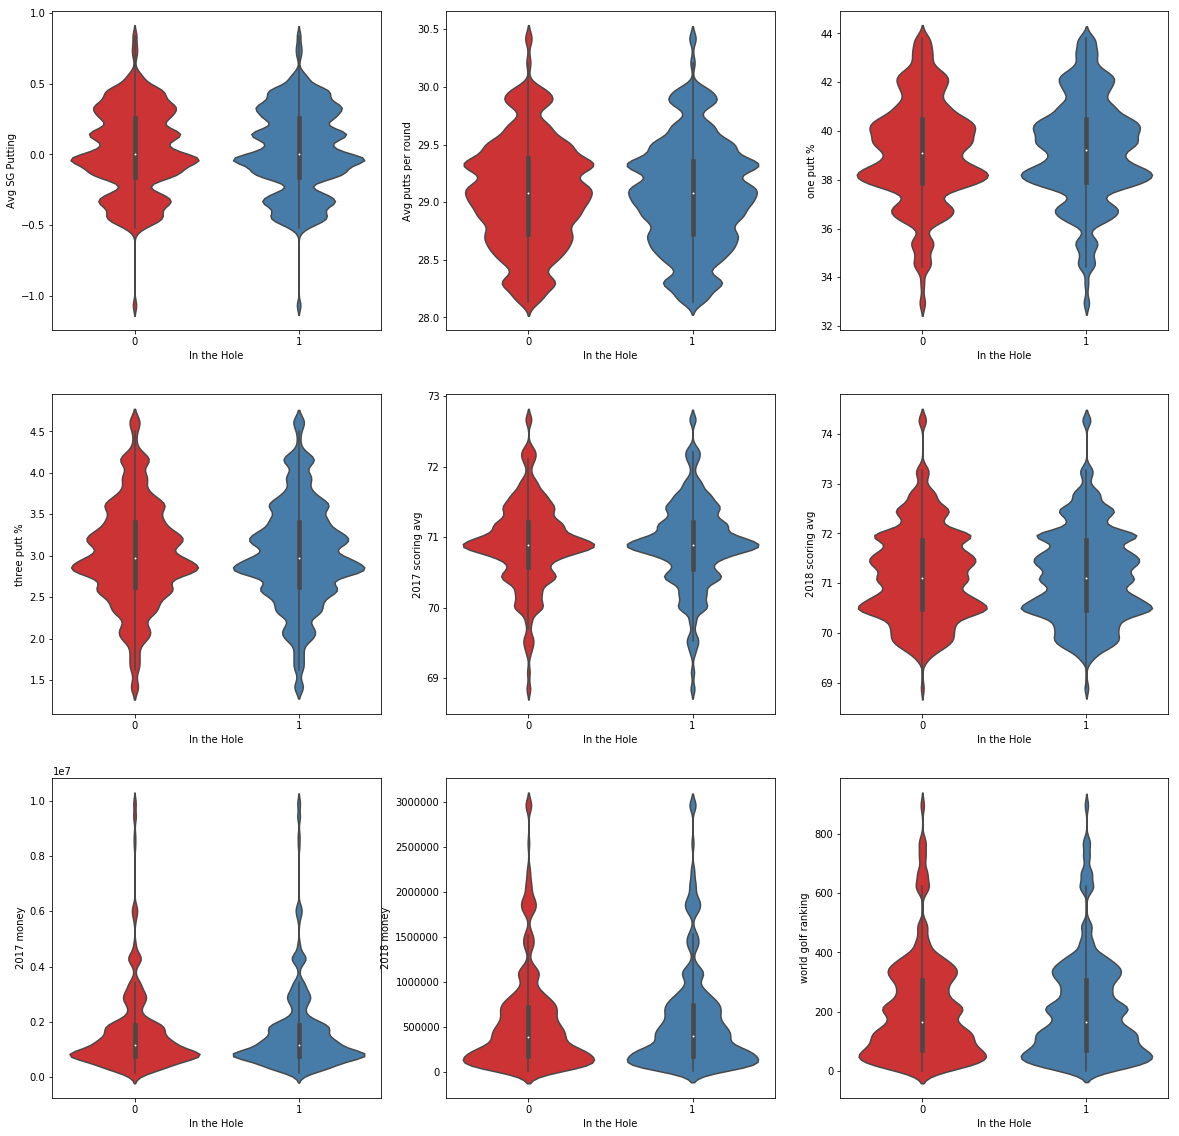

In [33]:
plt.subplots(figsize = (20,20))
plt.subplot(3,3,1)
sns.violinplot(x="In the Hole", y="Avg SG Putting", data=putts_final_df)
plt.subplot(3,3,2)
sns.violinplot(x="In the Hole", y="Avg putts per round", data=putts_final_df)
plt.subplot(3,3,3)
sns.violinplot(x="In the Hole", y="one putt %", data=putts_final_df)
plt.subplot(3,3,4)
sns.violinplot(x="In the Hole", y="three putt %", data=putts_final_df)
plt.subplot(3,3,5)
sns.violinplot(x="In the Hole", y="2017 scoring avg", data=putts_final_df)
plt.subplot(3,3,6)
sns.violinplot(x="In the Hole", y="2018 scoring avg", data=putts_final_df)
plt.subplot(3,3,7)
sns.violinplot(x="In the Hole", y="2017 money", data=putts_final_df)
plt.subplot(3,3,8)
sns.violinplot(x="In the Hole", y="2018 money", data=putts_final_df)
plt.subplot(3,3,9)
sns.violinplot(x="In the Hole", y="world golf ranking", data=putts_final_df)

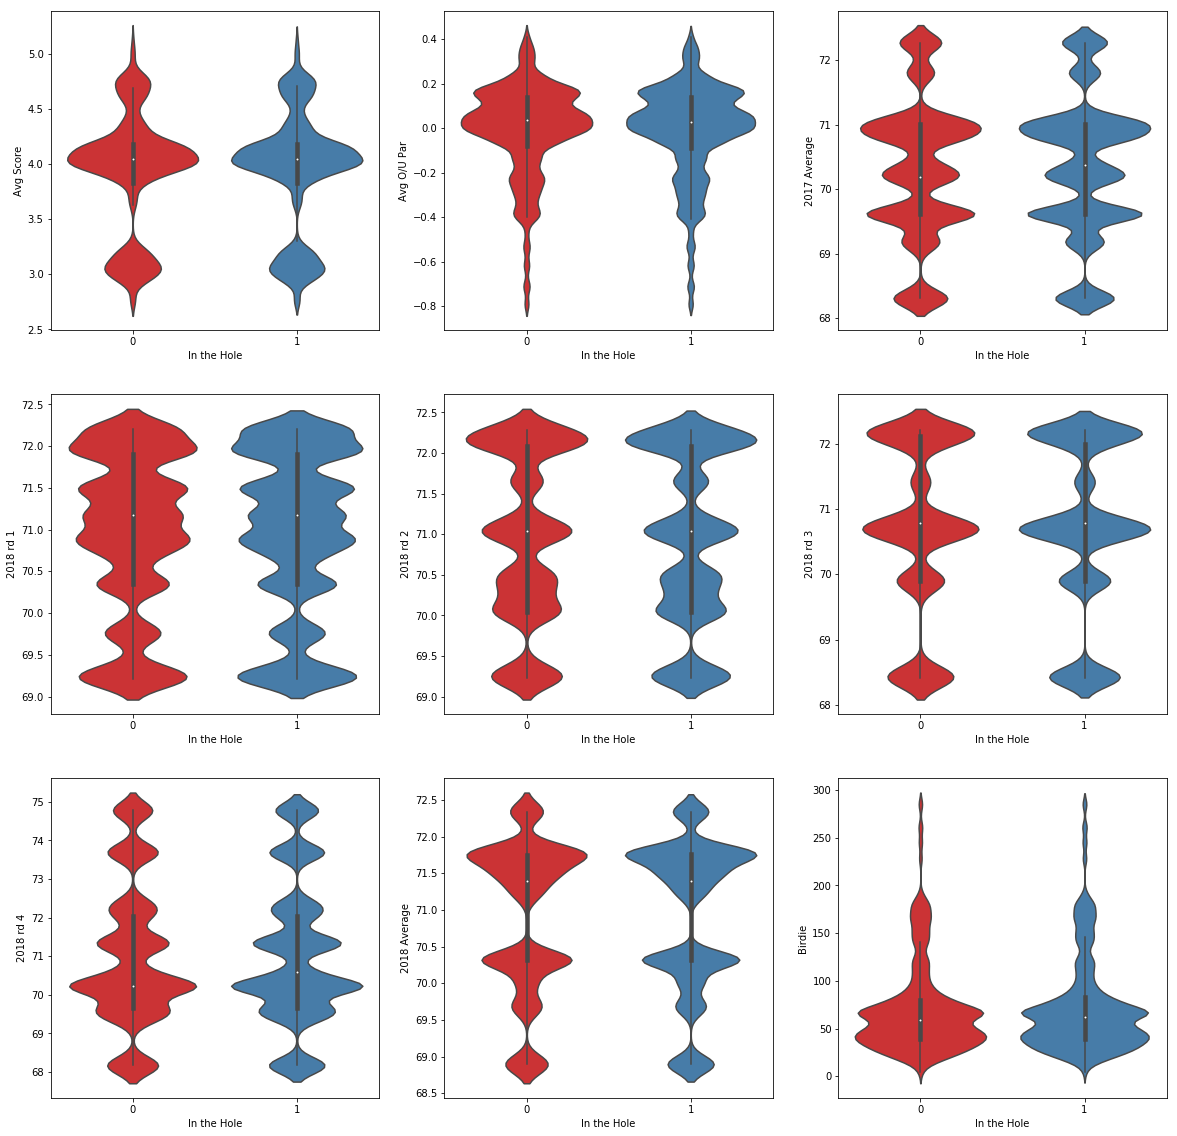

In [34]:
plt.subplots(figsize = (20,20))
plt.subplot(3,3,1)
sns.violinplot(x="In the Hole", y="Avg Score", data=putts_final_df)
plt.subplot(3,3,2)
sns.violinplot(x="In the Hole", y="Avg O/U Par", data=putts_final_df)
plt.subplot(3,3,3)
sns.violinplot(x="In the Hole", y="2017 Average", data=putts_final_df)
plt.subplot(3,3,4)
sns.violinplot(x="In the Hole", y="2018 rd 1", data=putts_final_df)
plt.subplot(3,3,5)
sns.violinplot(x="In the Hole", y="2018 rd 2", data=putts_final_df)
plt.subplot(3,3,6)
sns.violinplot(x="In the Hole", y="2018 rd 3", data=putts_final_df)
plt.subplot(3,3,7)
sns.violinplot(x="In the Hole", y="2018 rd 4", data=putts_final_df)
plt.subplot(3,3,8)
sns.violinplot(x="In the Hole", y="2018 Average", data=putts_final_df)
plt.subplot(3,3,9)
sns.violinplot(x="In the Hole", y="Birdie", data=putts_final_df)

All the violin plots look identical... let's move on and look at some of the categorical variables.

In [35]:
cols = putts_final_df.columns
num_cols = putts_final_df._get_numeric_data().columns
list(set(cols) - set(num_cols))

['Y Coordinate',
 'AgeGroup',
 'Abbreviated Event Name',
 'Tee Shot Landing Loc',
 'Appr Shot Start Loc',
 'X Coordinate',
 'AM Wind Dir',
 'Appr Shot Landing Loc',
 'Date',
 'PM Wind Dir',
 '1st Putt Flag',
 'Player',
 'Green Grass',
 'Event Player',
 'Distance to Hole',
 'Course Hole',
 'Left/Right',
 'Course Round Player',
 'Event Name',
 'PM Wind Spd',
 'AM Wind Spd',
 'Elevation',
 'Course Name',
 'Strokes Gained Category',
 'Tee Time',
 'Slope',
 'Course Round Hole',
 'Lie',
 'Grn Firmness',
 'Time Hole Finished',
 'From Location',
 'Player Course Round Hole',
 'Z Coordinate',
 'Player Name',
 'To Location']

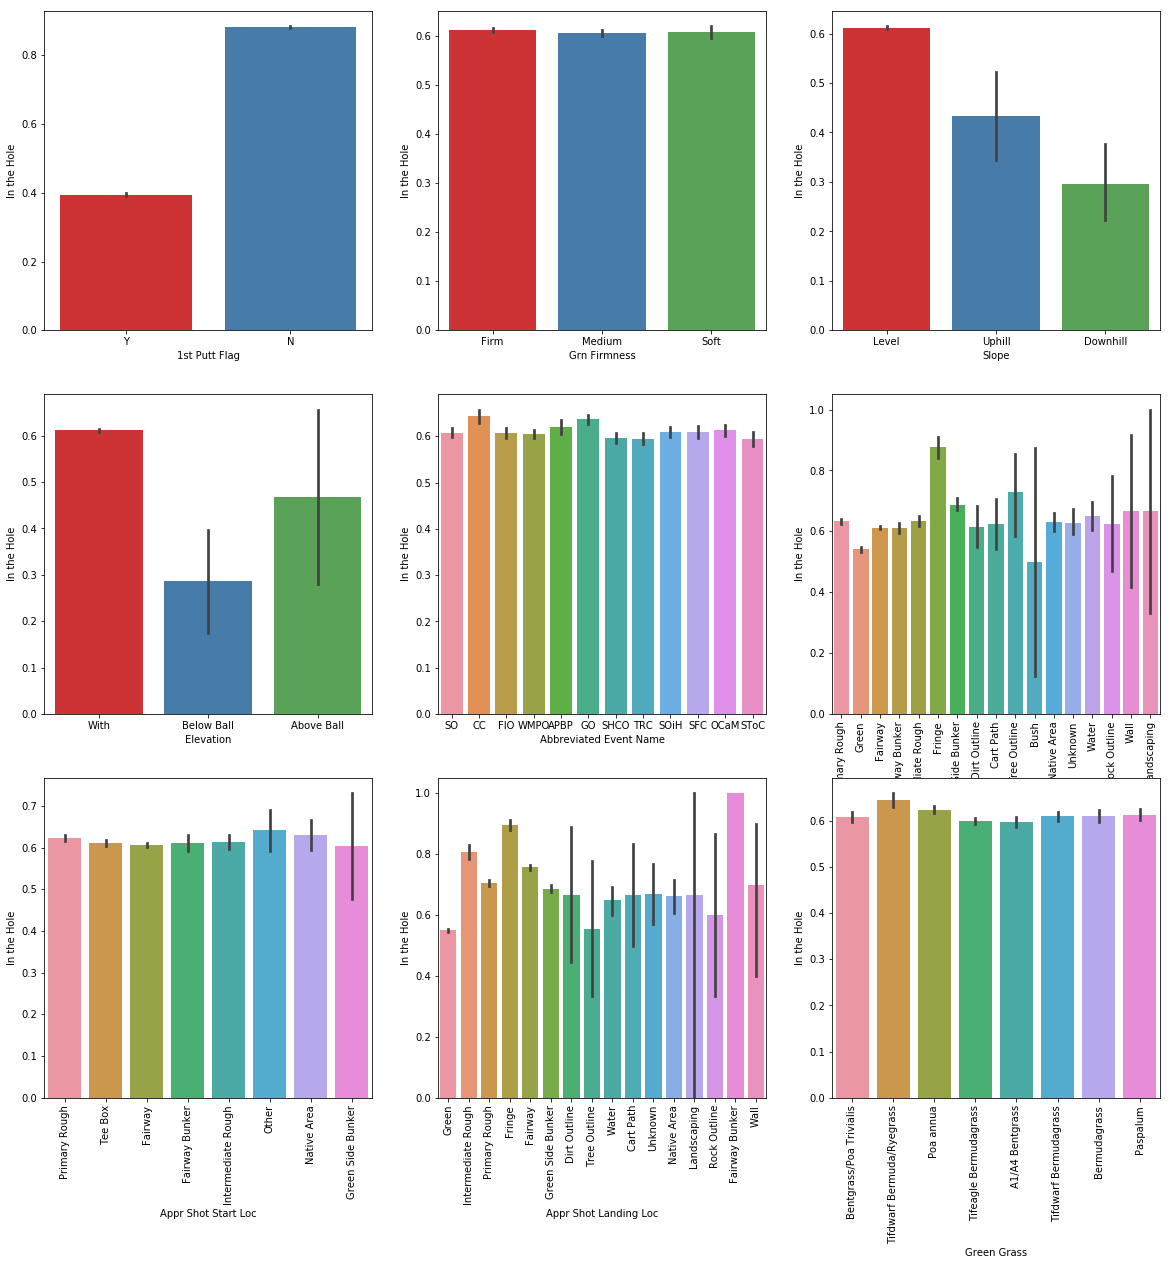

In [36]:
plt.subplots(figsize = (20,20))
plt.subplot(3,3,1)
sns.barplot(x="1st Putt Flag", y="In the Hole", data=putts_final_df)
plt.subplot(3,3,2)
sns.barplot(x="Grn Firmness", y="In the Hole", data=putts_final_df)
plt.subplot(3,3,3)
sns.barplot(x="Slope", y="In the Hole", data=putts_final_df)
plt.subplot(3,3,4)
sns.barplot(x="Elevation", y="In the Hole", data=putts_final_df)
plt.subplot(3,3,5)
sns.barplot(x="Abbreviated Event Name", y="In the Hole", data=putts_final_df)
plt.subplot(3,3,6)
sns.barplot(x="Tee Shot Landing Loc", y="In the Hole", data=putts_final_df)
plt.xticks(rotation=90)
plt.subplot(3,3,7)
sns.barplot(x="Appr Shot Start Loc", y="In the Hole", data=putts_final_df)
plt.xticks(rotation=90)
plt.subplot(3,3,8)
sns.barplot(x="Appr Shot Landing Loc", y="In the Hole", data=putts_final_df)
plt.xticks(rotation=90)
plt.subplot(3,3,9)
sns.barplot(x="Green Grass", y="In the Hole", data=putts_final_df)
plt.xticks(rotation=90)
plt.show()

Based on the data we have, there's just a handful of categorical variables that could be predictive, so we can look at all of them in the grid of barplots above. Some takeaways: players are unlikely to make the putt on their first try, slope and elevation are important but firmness apparently is not, Tifdwarf Bermuda/Ryegrass is easier to putt on than Tifeagle Bermudagrass, and shots landing on the fringe are much easier to make in one putt than shots landed on the green (this is cheating, actually, since the fringe is just outside the green and players can putt from there, but it's not officially counted as a putt, so the actual first counted putt is always much closer to the hole).

Because distance really seems to be the most important factor, let's look at a few of these variables in a facet grid against distance to make sure they're really not predictive.

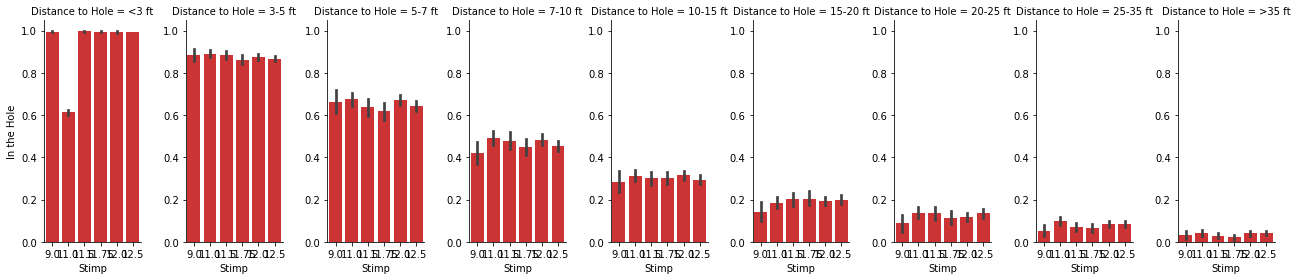

In [37]:
g = sns.FacetGrid(putts_final_df, col='Distance to Hole', size=4, aspect=.5)
g.map(sns.barplot, "Stimp", "In the Hole")

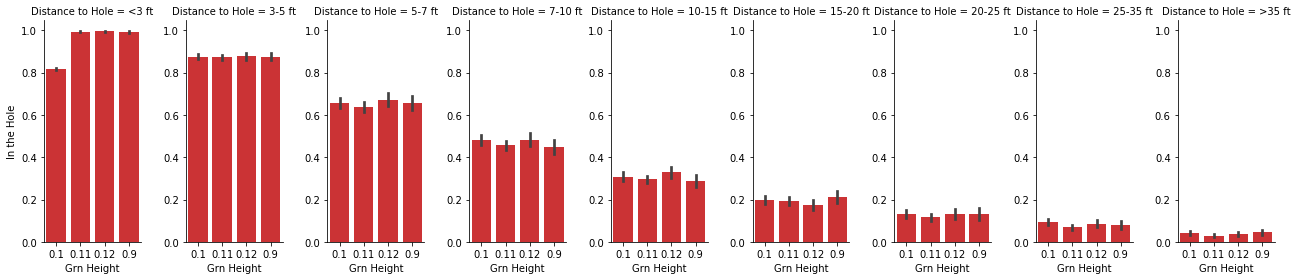

In [38]:
g = sns.FacetGrid(putts_final_df, col='Distance to Hole', size=4, aspect=.5)
g.map(sns.barplot, "Grn Height", "In the Hole")

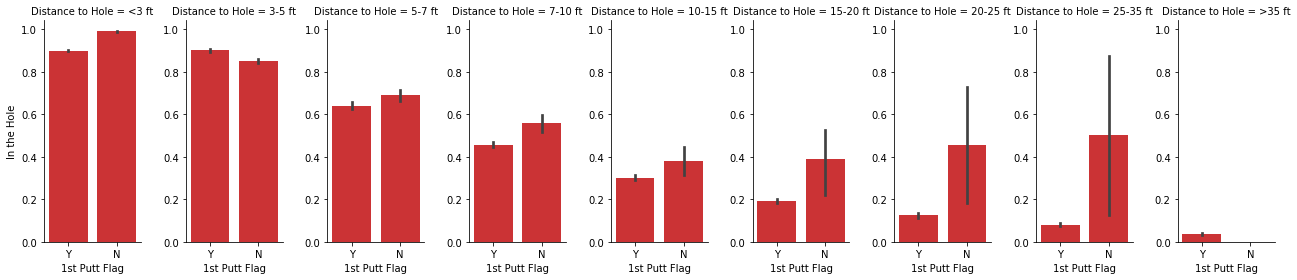

In [39]:
g = sns.FacetGrid(putts_final_df, col='Distance to Hole', size=4, aspect=.5)
g.map(sns.barplot, "1st Putt Flag", "In the Hole")

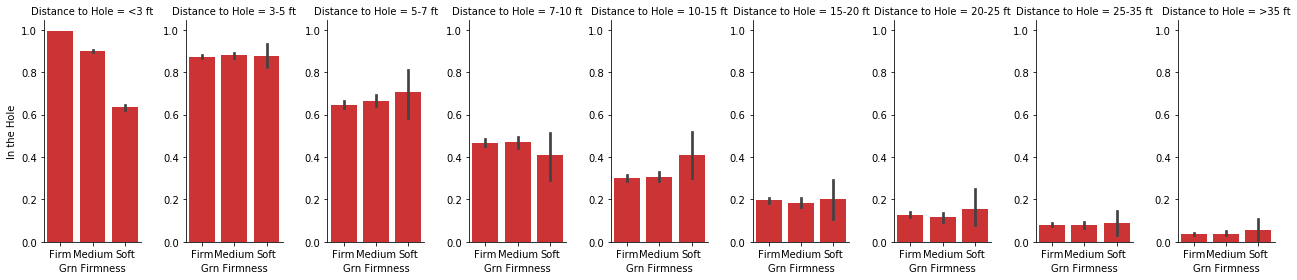

In [111]:
g = sns.FacetGrid(putts_final_df, col='Distance to Hole', size=4, aspect=.5)
g.map(sns.barplot, "Grn Firmness", "In the Hole")

The plots confirm that stimp and green height aren't too important, but we do get some interesting insights about first putts and firmness. Players normally make more than 95% of their putts within 3 feet, but the barchart above tells us that the number is closer to 90% if it's their first putt on the hole. It is made almost 100% of the time if it's not the first putt though.  Interestingly, players are more likely to make their first putt if it's within 3-5 feet, the only range where this is the case.

The first categorical barchart led us to believe that green firmness doesn't matter, but the facet plot above tells a different story. Players are more likely to miss short putts if the grass is soft, but slightly more likely to make long putts on soft surfaces.

#### 4. Model Building Preparation

Before building our model, let's take out all the variables in the dataset that are based on the outcome of the hole. You don't know what your score will be on a hole until you actually make the putt, so it wouldn't make sense to include these kinds of factors in our prediction.

In [207]:
putt_model_df = putts_final_df[[
 'Elevation',
 'Green Grass',
 'Slope',
 'Grn Firmness',
 '1st Putt Flag',
 'Course Name',
 'Shot',
 'Distance to Pin',
 'Grn Height',
 'Stimp',
 'Hole #',
 'Avg O/U Par',
 'Hit Fwy',
 'Hit Green',
 'Hit Greenside Bunker',
 'one putt %',
 'three putt %',
 'Total Holes Over Par - Round',
 'Total Holes Under Par - Round',
 'In the Hole']];

In [208]:
cols = putt_model_df.columns
num_cols = putt_model_df._get_numeric_data().columns
list(set(cols) - set(num_cols))

['Slope',
 'Grn Firmness',
 'Elevation',
 '1st Putt Flag',
 'Course Name',
 'Green Grass']

Convert categorical variables into dummy variables.

In [209]:
dummies = pd.get_dummies(putt_model_df[['Elevation',
 'Slope',
 'Grn Firmness',
 'Course Name',
 'Green Grass',
 '1st Putt Flag']])
putt_model_df = putt_model_df.drop(['Elevation',
 'Slope',
 'Grn Firmness',
 'Course Name',
 'Green Grass',
 '1st Putt Flag'], axis = 1)
putt_model_df = pd.concat([putt_model_df, dummies], axis = 1)
putt_model_df.head()

,Shot,Distance to Pin,Grn Height,Stimp,Hole #,Avg O/U Par,Hit Fwy,Hit Green,Hit Greenside Bunker,one putt %,...,Green Grass_A1/A4 Bentgrass,Green Grass_Bentgrass/Poa Trivialis,Green Grass_Bermudagrass,Green Grass_Paspalum,Green Grass_Poa annua,Green Grass_Tifdwarf Bermuda/Ryegrass,Green Grass_Tifdwarf Bermudagrass,Green Grass_Tifeagle Bermudagrass,1st Putt Flag_N,1st Putt Flag_Y
2,3,117,0.11,11.75,1,-0.014,0,1,0,41.18,...,0,1,0,0,0,0,0,0,0,1
3,4,13,0.11,11.75,1,-0.014,0,1,0,41.18,...,0,1,0,0,0,0,0,0,1,0
5,2,326,0.11,11.75,2,0.188,0,1,0,41.18,...,0,1,0,0,0,0,0,0,0,1
6,3,7,0.11,11.75,2,0.188,0,1,0,41.18,...,0,1,0,0,0,0,0,0,1,0
9,3,158,0.11,11.75,3,0.179,1,1,0,41.18,...,0,1,0,0,0,0,0,0,0,1


#### 5. Model Testing

Split into training and testing sets.

In [210]:
putt_train, putt_test = train_test_split(putt_model_df, test_size = 0.3, random_state = 50)

x_train = putt_train.drop(['In the Hole'], axis = 1)
y_train = putt_train['In the Hole']
x_test = putt_test.drop(['In the Hole'], axis = 1)
y_test = putt_test['In the Hole']

#### 5A. Logistic Regression

In [211]:
model_lr = LogisticRegression()
model_lr.fit(x_train,y_train)
pred_test=model_lr.predict(x_test)
metrics.accuracy_score(pred_test,y_test)

0.84296125499238272

Accuracy score of 84.3% from logistic regression is pretty good. Let's just make sure that none of the aggregated tournament and player statistics are useful.

In [212]:
putt_model_df_extended = putts_final_df[[
 'Avg Score',
 'Avg O/U Par',
 'Eagle',
 'Birdie',
 'Pars',
 'Bogey',
 'Dbl Bogey',
 'Other',
 '2017 Average',
 '2018 rd 1',
 '2018 rd 2',
 '2018 rd 3',
 '2018 rd 4',
 '2018 Average',
 'Avg SG Putting',
 'Avg putts per round',
 'one putt %',
 'three putt %',
 'Avg # of putts',
 '2017 scoring avg',
 '2018 scoring avg',
 '2017 money',
 '2018 money',
 'world golf ranking',
 'Elevation',
 'Green Grass',
 'Slope',
 'Grn Firmness',
 '1st Putt Flag',
 'Course Name',
 'Shot',
 'Distance to Pin',
 'Grn Height',
 'Stimp',
 'Hole #',
 'Avg O/U Par',
 'Hit Fwy',
 'Hit Green',
 'Hit Greenside Bunker',
 'one putt %',
 'three putt %',
 'Total Holes Over Par - Round',
 'Total Holes Under Par - Round',
 'In the Hole']];

dummies = pd.get_dummies(putt_model_df_extended[['Elevation',
 'Slope',
 'Grn Firmness',
 'Course Name',
 'Green Grass',
 '1st Putt Flag']])
putt_model_df_extended = putt_model_df_extended.drop(['Elevation',
 'Slope',
 'Grn Firmness',
 'Course Name',
 'Green Grass',
 '1st Putt Flag'], axis = 1)
putt_model_df_extended = pd.concat([putt_model_df_extended, dummies], axis = 1)

putt_train_ex, putt_test_ex = train_test_split(putt_model_df_extended, test_size = 0.3)

x_train_ex = putt_train_ex.drop(['In the Hole'], axis = 1)
y_train_ex = putt_train_ex['In the Hole']
x_test_ex = putt_test_ex.drop(['In the Hole'], axis = 1)
y_test_ex = putt_test_ex['In the Hole']

model_lr_ex = LogisticRegression()
model_lr_ex.fit(x_train_ex,y_train_ex)
pred_test_ex=model_lr_ex.predict(x_test_ex)
metrics.accuracy_score(pred_test_ex,y_test_ex)

0.83258533371762666

Accuracy score actually drops, so these extended features are safe to remove from the model.

#### 5B. Gaussian Naive Bayes

In [213]:
model_gnb = GaussianNB()
model_gnb.fit(x_train, y_train)
pred_test=model_gnb.predict(x_test)
metrics.accuracy_score(pred_test, y_test)

0.81257462840202577

#### 5C. Decision Tree

In [214]:
model_dtc=DecisionTreeClassifier()
model_dtc.fit(x_train,y_train)
pred_test=model_dtc.predict(x_test)
metrics.accuracy_score(pred_test,y_test)

0.80685140198460081

#### 5D. Random Forest

In [215]:
model_rfc=RandomForestClassifier(n_estimators=100)
model_rfc.fit(x_train,y_train)
pred_test=model_rfc.predict(x_test)
metrics.accuracy_score(pred_test,y_test)

0.86033680569852189

#### 5E. Gradient Boosting

In [216]:
model_gbc=GradientBoostingClassifier()
model_gbc.fit(x_train,y_train)
pred_test=model_gbc.predict(x_test)
metrics.accuracy_score(pred_test,y_test)

0.86774817803763327

#### 5F. K Nearest Neighbors

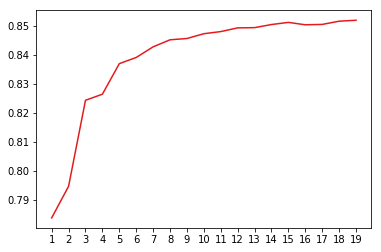

In [220]:
a_index=list(range(1,20))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
for i in list(range(1,20)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(x_train,y_train)
    pred_test=model.predict(x_test)
    a=a.append(pd.Series(metrics.accuracy_score(pred_test,y_test)))
plt.plot(a_index, a)
plt.xticks(x)
plt.show()

In [218]:
model_knn10 = KNeighborsClassifier(n_neighbors=10)
model_knn10.fit(x_train,y_train)
pred_test=model_knn10.predict(x_test)
metrics.accuracy_score(pred_test,y_test)

0.84736690410507676

#### 6. Conclusion

Our winner is Gradient Boosting Classification with an accuracy score of 86.7%! Distance seemed to be the most predictive feature, so let's run the model with only distance to pin included.

In [221]:
putt_distance = putt_model_df[['Distance to Pin', 'In the Hole']];
putt_train_dist, putt_test_dist = train_test_split(putt_distance, test_size = 0.3, random_state = 50)

x_train_dist = putt_train_dist.drop(['In the Hole'], axis = 1)
y_train_dist = putt_train_dist['In the Hole']
x_test_dist = putt_test_dist.drop(['In the Hole'], axis = 1)
y_test_dist = putt_test_dist['In the Hole']

model_gbc_dist = GradientBoostingClassifier()
model_gbc_dist.fit(x_train_dist,y_train_dist)
pred_test_dist=model_gbc_dist.predict(x_test_dist)
metrics.accuracy_score(pred_test_dist,y_test_dist)

0.8439906122617038

Accuracy drops only by 2.5% if we remove distance. Would the non-distance factors be able to predict putt makes at all then?

In [222]:
putt_no_distance = putt_model_df.drop(['Distance to Pin'], axis = 1);
putt_train_no_dist, putt_test_no_dist = train_test_split(putt_no_distance, test_size = 0.3, random_state = 50)

x_train_no_dist = putt_train_no_dist.drop(['In the Hole'], axis = 1)
y_train_no_dist = putt_train_no_dist['In the Hole']
x_test_no_dist = putt_test_no_dist.drop(['In the Hole'], axis = 1)
y_test_no_dist = putt_test_no_dist['In the Hole']

model_gbc_no_dist = GradientBoostingClassifier()
model_gbc_no_dist.fit(x_train_no_dist,y_train_no_dist)
pred_test_no_dist=model_gbc_no_dist.predict(x_test_no_dist)
metrics.accuracy_score(pred_test_no_dist,y_test_no_dist)

0.80928068514019846

In [223]:
model_gbc=GradientBoostingClassifier()
model_gbc.fit(x_train,y_train)
pred_test=model_gbc.predict(x_test)
metrics.accuracy_score(pred_test,y_test)

0.86774817803763327

We still have an accuracy of almost 81% when we remove all distance variables - compared to 86.7% including distance - so we can say our other features were predictive. Great!

Now let's look at which features were important for classification in our model.

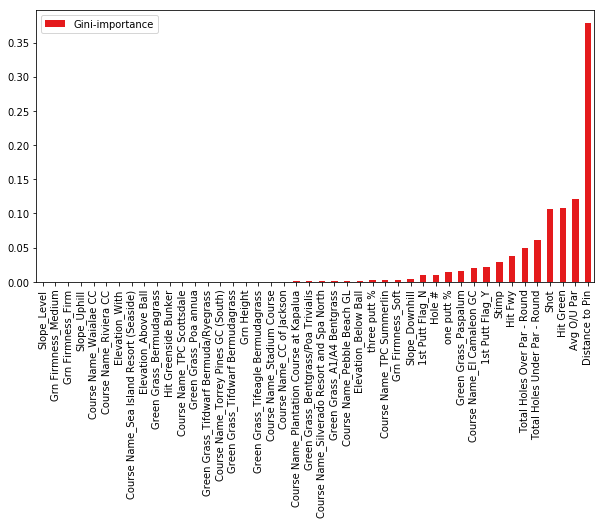

In [224]:
#reference: https://stackoverflow.com/questions/41900387/mapping-column-names-to-random-forest-feature-importances

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(x_train.columns, model_gbc.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', figsize=(10, 5), rot=90)

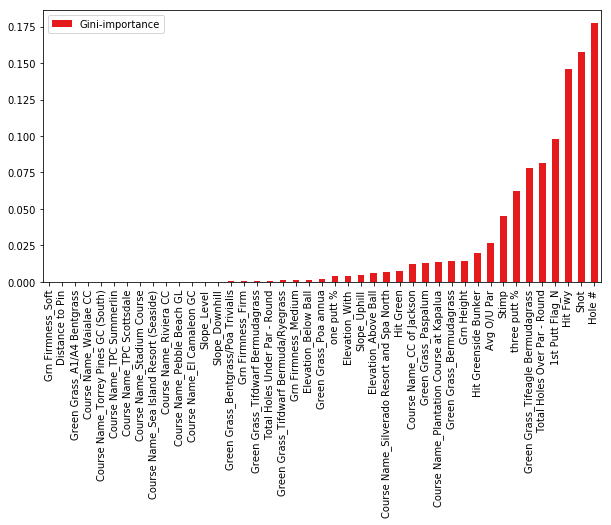

In [225]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(x_train.columns, model_gbc_no_dist.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', figsize=(10, 5), rot=90)

We see that hole #, shot #, if a fairway was hit, if it was not their first putt, total holes over par in the round, trifeagle bermuda grasss, three putt %, and stimp are also important variables in predicting whether a putt will go in. Let's wrap this up by showing our final confusion matrix for our classification models.

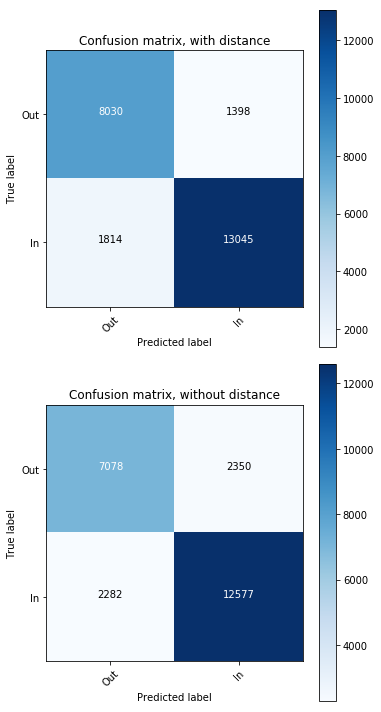

In [226]:
#Reference: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

import itertools
class_names = ["Out", "In"]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.subplots(figsize=(10,10))
cnf_matrix = confusion_matrix(y_test, pred_test)
cnf_matrix_no_dist = confusion_matrix(y_test_no_dist,pred_test_no_dist)
plt.subplot(2,2,1)
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, with distance')
plt.subplot(2,2,3)
plot_confusion_matrix(cnf_matrix_no_dist, classes=class_names,title='Confusion matrix, without distance')

#### 7. Data Dictionary

Players:

    Dataset with putting statistics from 2017 season as well as other player stats

    Player: Player Name
    Avg SG Putting: Strokes Gained - Average number of putts taken by player minus Tour Average
    Avg putts per round: Average number of putts taken per round
    one putt %: % of holes where player needed just one putt
    three putt %: % of holes where player needed three or more putts
    2017 scoring avg: Average score over every round in 2017 season (usually par 72)
    2018 scoring avg: Average score over every round in 2018 season
    2017 money: Total amount (in dollars) earned over 2017 season
    2018 money: Total amount (in dollars) earned over 2018 season
    world golf ranking: official player ranking as of 2/19/18
    events: number of tournaments over 2 year span used to calculate golf ranking
    
Tournaments:

    Aggregated tournament stats for every event played in 2018 season (as well as 2017 stats for same event)
    
    Course Hole: Primary Key for merging with Shots dataset; includes course name and hole #
    Avg Score: Average score by all players on hole in 2018 season
    Avg O/U Par: Average score relative to par on hole
    Eagle: Total number of eagles on hole in tournament (two strokes better than par)
    Birdie: Total number of birdies on hole in tournament (one stroke better than par)
    Pars: Total number of pars on hole in tournament
    Bogey: Total number of bogeys on hole in tournament (one strokes worse than par)
    Dbl Bogey: Total number of double bogeys on hole in tournament (two strokes worse than par)
    Other: Total number of double bogey + on hole in tournament (more than two strokes worse than par)
    2017 Average: Average score in tournament per each round in 2017 season
    2018 rd 1: Average score in tournament in 1st round in 2018 season
    2018 rd 2: Average score in tournament in 2nd round in 2018 season
    2018 rd 3: Average score in tournament in 3rd round in 2018 season
    2018 rd 4: Average score in tournament in 4th round in 2018 season
    2018 Average: Average score in tournament per each round in 2018 season
    
Courses:

    Dataset with details and statistics about each course played in 2018 season
    
    Course Round Hole: Primary Key for merging with Shots dataset; includes course name, round #, and hole #
    Grn Firmness: Firmness of green - firm, medium, or soft
    Grn Height: Height of grass on green
    Stimp: Value representing how fast ball rolls on putting surface (green)
    AM Wind Spd: Wind speed in morning
    AM Wind Dir: Wind direction in morning
    PM Wind Spd: Wind speed in afternoon
    PM Wind Dir: Wind direction in afternoon    
    Green Grass: Type of grass on green
    
Events:
    
    Dataset with total tournament statistics for every player in every tournament during 2018 season
    
    Event Player: Primary Key for merging with Shots dataset; includes name of tournament and player
    Age: Age of player
    Position: Place in tournament leaderboard - 999 assigned to players who were cut for being in the bottom half of the leadsherboard after 2 rounds
    Round 1 Score: Score in round 1 of tournament
    Round 2 Score: Score in round 2 of tournament
    Round 3 Score: Score in round 3 of tournament
    Round 4 Score: Score in round 4 of tournament
    Total Strokes: Total score after all 4 rounds
    Total Rounds: Number of rounds played (cut players only play 2, while the rest play 4)
    Total Holes Over Par: Number of bogeys or worse in tournament
    Total Holes Under Par: Number of birdies + eagles in tournament
    GIR: Greens in Regulation - # of greens hit with chance to putt for birdie or better in tournament
    Longest Drive: Distance of longest drive
    Total Putts: Total # of putts in tournament
    GIR Putts: Total # of putts after hitting green in regulation
    Total One Putts: Number of holes where player needed just one putt
    Total 3 Putts: Number of holes where player needed 3 putts or more
    Total Distance of Putts: summed distance of all made putts in tournament
    
Rounds:

    Dataset with round statistics for every player in every tournament during 2018 season
    
    Course Round Player: Primary Key for merging with Shots dataset; name of course, player, and round #
    Course Par: Predetermined total number of shots a scratch golfer should require to complete course
    Course Yardage: Total distance of all 18 holes combined on golf course
    Tee Time: Time each player started their round
    Round Score: Score for each player after finishing round of 18 holes
    End of Round Finish Pos: Place in leaderboard after round
    End of Event Finish Pos: Place in leaderboard after tournament
    Eagles - Round: Total number of eagles in round
    Birdies - Round: Total number of birdies in round
    Pars - Round: Total number of pars in round
    Bogeys - Round: Total number of bogeys in round
    Doubles - Round: Total number of double bogeys in round
    Others - Round: Total number of holes worse than double bogey in round
    Total Holes Over Par - Round: Total number of holes with bogey or worse
    Longest Drive - Round: Distance of longest drive
    GIR - Round: Total number of greens hit in regulation
    Total Putts - Round: Total # of putts in round
    GIR Putts - Round: Total # of putts after hitting green in regulation
    Total One Putts - Round: Number of holes where player needed just one putt
    Total 3 Putts - Round: Number of holes where player needed 3 putts or more
    Total Distance of Putts - Round: summed distance of all made putts in round
    
Holes:

    Dataset with statistics for every hole played in 2018 season
    
    Player Course Round Hole: Primary Key for merging with shots dataset; includes name of player, course, round #, and hole #
    Player Name: Name of player
    Hole #: Hole # in round
    Round #: Round # in tournament
    Final Round: 1 if round 4, else 0
    Event Name: Name of tournament
    Course Name: Name of golf course
    Par - Hole: Predetermined total number of shots a scratch golfer should require to complete hole
    Scorecard Yard: Total distance of hole from tee to flag
    Score: Score by player on hole
    RTP Score: Score by player on hole relative to par
    Hit Fwy: 1 if hit fairway, else 0
    Hit Green: 1 if hit green, else 0
    Hit Greenside bunker: 1 if hit greenside bunker, else 0
    Sand Save: 1 if saved out of sand, else 0
    Scrambling Success: -1 if not relevant, 0 if failed to scramble, 1 if able to scramble (save par in rough situation)
    Putts: Total number of putts in hole
    Driving Distance: Distance in yards of tee shot drive
    Tee Shot Landing Loc: Landing region of tee shot
    Appr Shot Dist to the Pin: distance to pin for second shot
    Appr Shot Prox to the Hole: distance to hole after approach shot
    Appr Shot Landing Loc: Landing region of approach shot
    Made Putt Distance: Distance of made putt
    Went for it: -1 if did not try to hit green for an eagle try, 0 if did try, 1 if actually hit green
    Appr Shot Start Loc: Starting region of approach shot
    Hole Seq #: Sequential order in which hole was played in round
    Time Hole Finished: Time when hole was finished

Shots:

    Dataset with statistics for every shot taken on PGATour in 2018
    Player: Player Name
    Course Hole: Primary Key for merging with tournaments dataset; includes course name and hole #
    Course Round Hole: Primary Key for merging with courses dataset; includes course name, round #, and hole #
    Event Player: Primary Key for merging with events dataset; includes name of tournament and player
    Course Round Player: Primary Key for merging with rounds dataset; name of course, player, and round #
    Player Course Round Hole: Primary Key for merging with holes dataset; includes name of player, course, round #, and hole #
    Shot: Shot # in hole
    From Location: Where shot was hit from
    To Location: Where shot landed
    Distance: Distance traveled by shot
    Distance to Pin: Distance from ball's starting position to Hole
    Distance to Hole after the Shot: Distance from ball to pin after shot is hit
    1st Putt Flag: Y if first putt on hole, N if second or later
    Lie: Angle of club shaft and ground over ball
    Elevation: Hole is above or below ball
    Slope: Slope of grass surface
    X Coordinate: X Coordinate of ball relative to hole
    Y Coordinate: Y Coordinate of ball relative to hole
    Z Coordinate: Z Coordinate of ball relative to hole
    Distance from Center: Distance of ball from center of hole
    Distance from Edge: Distance of ball from edge of hole
    Date: Date the shot was played
    Left/Right: Left or right position of ball relative to hole after hitting shot
    Strokes Gained Category: Type of shot hit
    In the Hole Flag: Outcome Variable; Y if in hole after shot, N if not